In [1]:
# Copyright (c) Facebook, Inc. and its affiliates.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

import torch
import torch.nn as nn
from ppuda.ghn.nn import GHN2
from ppuda.deepnets1m.graph import Graph

# Predict parameters for a fully-connected neural network (MLP)

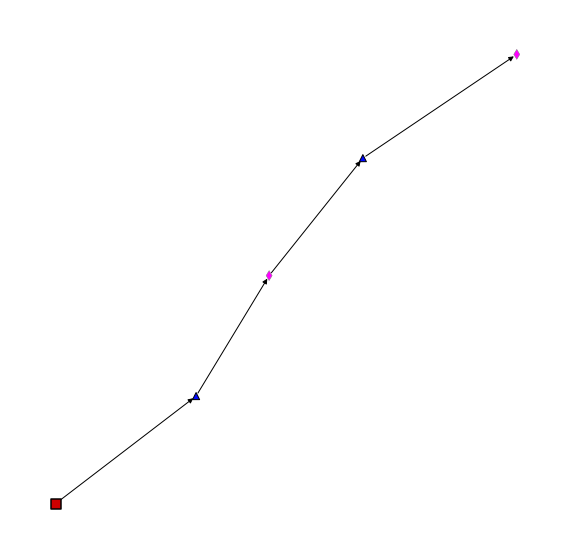

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1000000, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
)
number of parameter tensors predicted using GHN: 4, total parameters predicted: 64000194 (MATCHED!), time to predict (on CUDA:0): 0.2748 sec
predictions:
 tensor([[9.5539, 8.7456],
        [9.5420, 8.7253],
        [9.5402, 8.7330],
        [9.5495, 8.7399],
        [9.5667, 8.7562]], grad_fn=<AddmmBackward>)

done


In [2]:
ghn = GHN2('imagenet')  # load GHN2 trained on ImageNet

in_features = 1000000   # assume we have tabular data with 100000 features
num_classes = 2         # assume we want to solve a binary classification task for these data

# Define the network configuration
class MLP(nn.Module):
    def __init__(self, in_features, num_classes, C=64):
        super(MLP, self).__init__()
        self.in_features = in_features
        self.layers = nn.Sequential(nn.Linear(in_features, C),
                                    nn.ReLU(),
                                    nn.Linear(C, num_classes)
                                    )

    def forward(self, x):
        return self.layers(x)

model = MLP(in_features=in_features, num_classes=num_classes).eval()    # Create the net
model.expected_input_sz = (in_features,)
Graph(model).visualize()
print(model)
model = ghn(model)      # Predict all parameters for the model

# Make predictions using the predicted parameters on 5 samples
model.to('cpu')
n_samples = 5
x = torch.rand(n_samples, in_features)  # generate random input
print('predictions:\n', model(x))  
# Note: since GHN2 was trained on ImageNet, these predictions will be meaningless
# But predicted parameters may be useful as a starting point depending on the task

print('\ndone')